In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def tomtom_result(folder):
    files = pd.DataFrame(os.listdir("../result/motif/%s/" % (folder)))
    files.loc[:, [1,2]] = files[0].str.split("_", expand=True, n=1).values
    motifs = [ii.replace(".meme", "") for ii in os.listdir("/home/jg2447/slayman/motifs/pwm/cisbp_InferAndDirect/fly_stack/")]
    files[3] = files[1].isin(motifs)
    valid = files.loc[files[3], 0].values
    valid_m = files.loc[files[3], 1].values

    number_list = []
    for ii in valid:
        df = pd.read_csv("../result/tomtom/%s/%s/tomtom.tsv" % (folder, ii), sep="\t", skipfooter=3, engine='python')
        df = df[df['p-value']<0.05]
        if len(df)>0:
            number = df['Query_ID'].str.split("-", expand=True)[0].astype(int).min()
        else:
            number = np.nan
        number_list.append(number)
    result = pd.DataFrame([valid, number_list]).T
    return(result)

In [17]:
result1 = tomtom_result("FlySTREME_AllPeaks")

In [18]:
result2 = tomtom_result("FlySTREME_Top20Percent")
result3_r1 = tomtom_result("FlySTREME_Top20PercentRandom_Rep1")
result3_r2 = tomtom_result("FlySTREME_Top20PercentRandom_Rep2")
result3_r3 = tomtom_result("FlySTREME_Top20PercentRandom_Rep3")

In [19]:
result4 = tomtom_result("FlySTREME_RemoveHOT")
result5_r1 = tomtom_result("FlySTREME_RemoveHOTRandom_Rep1")
result5_r2 = tomtom_result("FlySTREME_RemoveHOTRandom_Rep2")
result5_r3 = tomtom_result("FlySTREME_RemoveHOTRandom_Rep3")

In [20]:
result6 = tomtom_result("FlySTREME_RemoveUltraHOT")
result7_r1 = tomtom_result("FlySTREME_RemoveUltraHOTRandom_Rep1")
result7_r2 = tomtom_result("FlySTREME_RemoveUltraHOTRandom_Rep2")
result7_r3 = tomtom_result("FlySTREME_RemoveUltraHOTRandom_Rep3")

In [21]:
result3 = pd.merge(result3_r1, result3_r2, left_on=0, right_on=0).merge(result3_r3, left_on=0, right_on=0)
result3 = pd.DataFrame([result3[0].values, result3.iloc[:, 1:].mean(axis=1).values]).T

In [22]:
result5 = pd.merge(result5_r1, result5_r2, left_on=0, right_on=0).merge(result5_r3, left_on=0, right_on=0)
result5 = pd.DataFrame([result5[0].values, result5.iloc[:, 1:].mean(axis=1).values]).T

In [23]:
result7 = pd.merge(result7_r1, result7_r2, left_on=0, right_on=0).merge(result7_r3, left_on=0, right_on=0)
result7 = pd.DataFrame([result7[0].values, result7.iloc[:, 1:].mean(axis=1).values]).T

In [24]:
result = pd.merge(result1, result2, left_on=0, right_on=0)
result = result.merge(result3, left_on=0, right_on=0)
result.columns = range(4)
result = result.merge(result4, left_on=0, right_on=0)
result = result.merge(result5, left_on=0, right_on=0)
result.columns = range(6)
result = result.merge(result6, left_on=0, right_on=0)
result = result.merge(result7, left_on=0, right_on=0)
result.columns = range(8)

In [25]:
# number of experiments with cisbp motif to compare to
result.shape[0]

381

In [26]:
# success rate, anything not null is a success
1 - result.set_index(0).isnull().sum() / result.shape[0]

1    0.847769
2    0.656168
3    0.763780
4    0.713911
5    0.845144
6    0.572178
7    0.640420
dtype: float64

In [27]:
# consider only top 3 that have a match as success
(result.set_index(0).fillna(100)<=3).mean()

1    0.209974
2    0.251969
3    0.207349
4    0.275591
5    0.204724
6    0.354331
7    0.280840
dtype: float64

### plot - fly

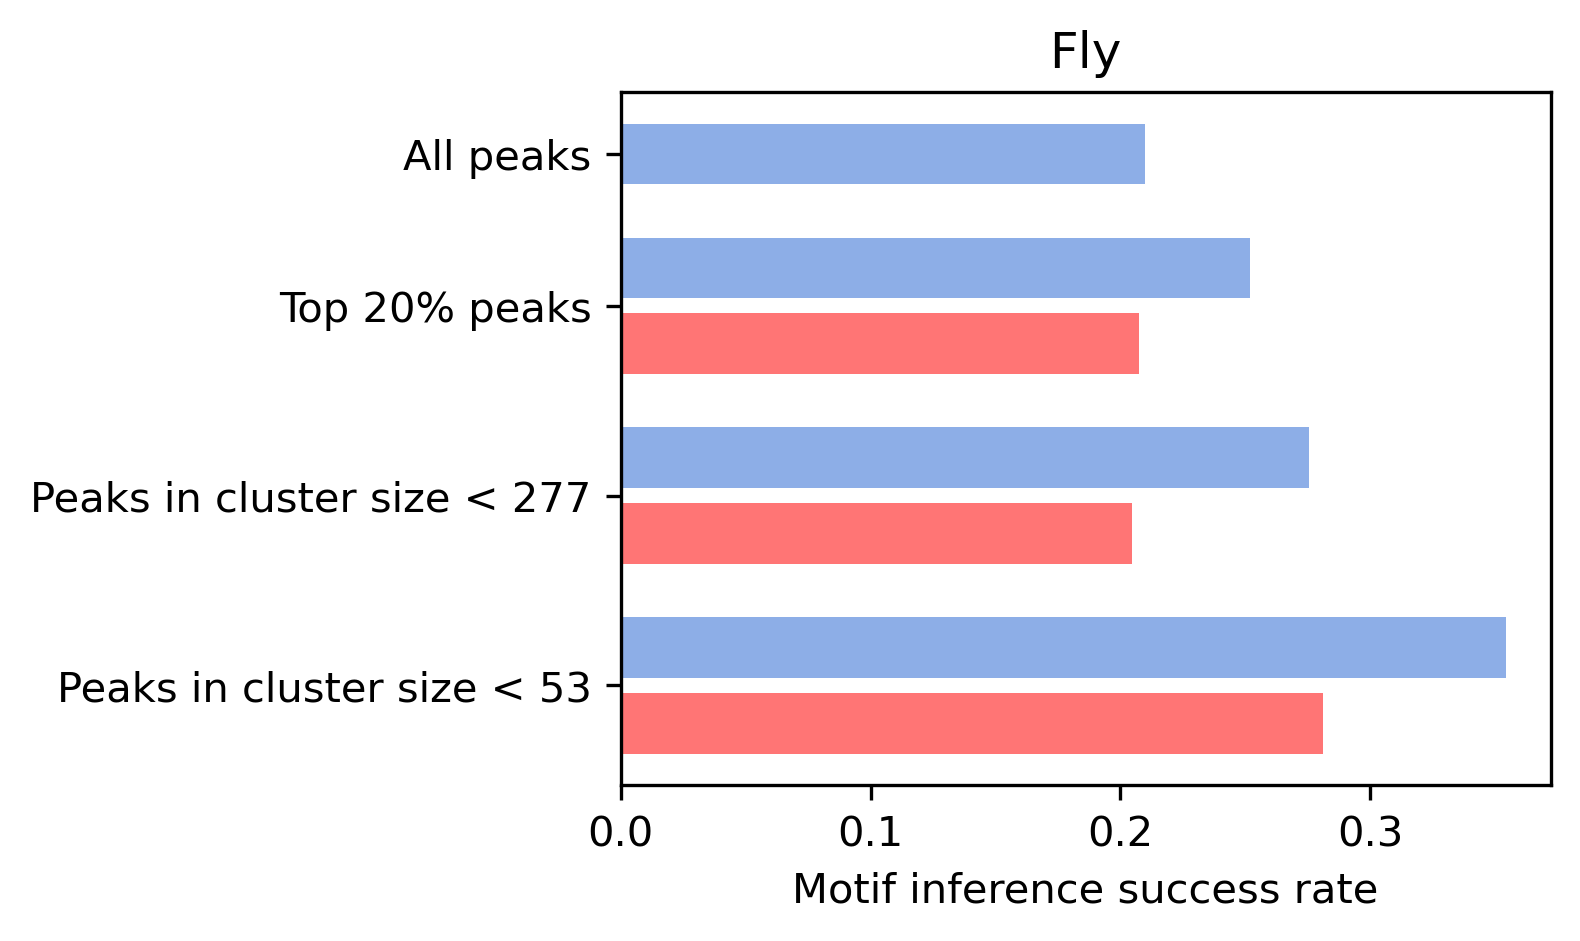

In [14]:
plt.figure(dpi=300, figsize=(4,3))
plt.barh(y=[1,2, 3.5,4.5, 6,7, 8.5],
         width=(result.set_index(0).fillna(100)<=3).mean().values[::-1],
         color=["#FF7575", "#8DAEE7", "#FF7575", "#8DAEE7", "#FF7575", "#8DAEE7", "#8DAEE7"])
plt.yticks([1.5, 4, 6.5, 8.5], labels=["Peaks in cluster size < 53", "Peaks in cluster size < 277", "Top 20% peaks", "All peaks"])
plt.xticks([0.0, 0.1, 0.2, 0.3])
plt.title("Fly")
plt.xlabel("Motif inference success rate")
plt.savefig("./figure_C_Fly_motif.pdf", dpi="figure", bbox_inches="tight")

### plot - worm

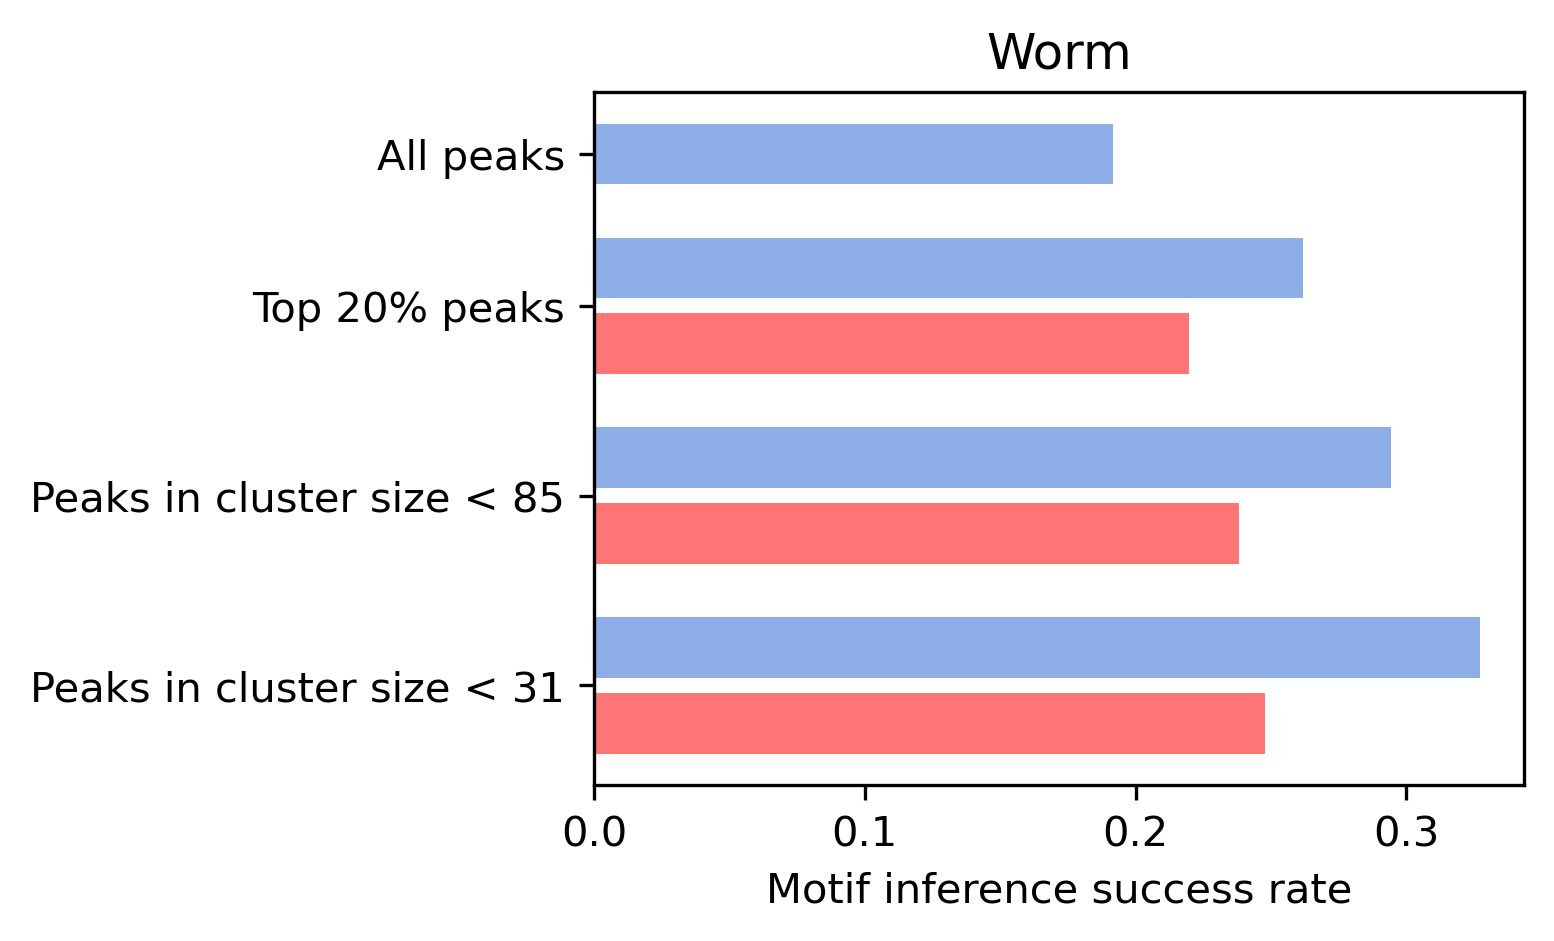

In [27]:
plt.figure(dpi=300, figsize=(4,3))
plt.barh(y=[1,2, 3.5,4.5, 6,7, 8.5],
         width=(result.set_index(0).fillna(100)<=3).mean().values[::-1],
         color=["#FF7575", "#8DAEE7", "#FF7575", "#8DAEE7", "#FF7575", "#8DAEE7", "#8DAEE7"])
plt.yticks([1.5, 4, 6.5, 8.5], labels=["Peaks in cluster size < 31", "Peaks in cluster size < 85", "Top 20% peaks", "All peaks"])
plt.xticks([0.0, 0.1, 0.2, 0.3])
plt.title("Worm")
plt.xlabel("Motif inference success rate")
plt.savefig("./figure_D_Worm_motif.pdf", dpi="figure", bbox_inches="tight")